In [ ]:
# Import all the libraries I need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Activation, Dropout      # create layers

import pyarrow.parquet as pq
import pyarrow as pa

np.random.seed(42)
tf.random.set_seed(42)



In [4]:
!pip install ipynb
from ipynb.fs.full.decide_what_data_for_binary_model import Location_in_Target

  Using cached ipynb-0.5.1-py3-none-any.whl (6.9 kB)


In [ ]:
#get all of the labels
labels_training = pd.read_csv('/Users/cando/neuefische/myfolder/human-protein-atlas-image-classification/data/train.csv')

In [7]:
labels_training

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
...,...,...
31067,ffed4430-bbac-11e8-b2ba-ac1f6b6435d0,21
31068,fff0a998-bbae-11e8-b2ba-ac1f6b6435d0,5
31069,fff189d8-bbab-11e8-b2ba-ac1f6b6435d0,7
31070,fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0,25 2 21


#### Test the class with Mitochondria labeled with a 23

In [8]:
mitochondria_pictures = Location_in_Target(location = 23)
mitochondria_pictures.determine_pictures(labels_training)
#Dataframe with filenames of pictures which have mitochondria
df_mit = mitochondria_pictures.get_pictures().pictures_with_location_23
#Dataframe with filenames of pictures which have no mitochondria
df_no_mit = mitochondria_pictures.get_pictures().pictures_without_location_23
#mitochondria_pictures.get_pictures().head()
print(df_no_mit)

0       62269b24-bb9e-11e8-b2b9-ac1f6b6435d0
1       7e0e48ae-bba4-11e8-b2b9-ac1f6b6435d0
2       0e70a99a-bbbf-11e8-b2ba-ac1f6b6435d0
3       28c5be1c-bbaf-11e8-b2ba-ac1f6b6435d0
4       27c998f8-bbb4-11e8-b2ba-ac1f6b6435d0
                        ...                 
2960    73966c8e-bba5-11e8-b2ba-ac1f6b6435d0
2961    b22d106e-bbba-11e8-b2ba-ac1f6b6435d0
2962    450424ae-bbca-11e8-b2bc-ac1f6b6435d0
2963    aa62d426-bbac-11e8-b2ba-ac1f6b6435d0
2964    91e7b7b4-bb9c-11e8-b2b9-ac1f6b6435d0
Name: pictures_without_location_23, Length: 2965, dtype: object


In [6]:
# load parquet files, convert to pandas and get strings as strings
embed_path = "/Users/cando/neuefische/myfolder/human-protein-atlas-image-classification/data/embeddings_train"
emb = pq.read_table(embed_path).to_pandas()
for col in ['target_id', 'image_path', 'image_name']:
    emb[col] = emb[col].str.decode('utf-8')#.fillna(df[col]) 
emb

,target_id,image_path,embedding,image_name
0,7,../data/train/4b0d7acc-bbb5-11e8-b2ba-ac1f6b64...,"[-0.14782768, -0.19346946, 0.029495712, -0.114...",4b0d7acc-bbb5-11e8-b2ba-ac1f6b6435d0
1,5 0,../data/train/4b0e4648-bbc2-11e8-b2bb-ac1f6b64...,"[-0.11768038, 0.108380914, -0.07158355, -0.051...",4b0e4648-bbc2-11e8-b2bb-ac1f6b6435d0
2,23,../data/train/4b0fe352-bbbf-11e8-b2ba-ac1f6b64...,"[-0.14264518, -0.14894637, 0.015262008, -0.138...",4b0fe352-bbbf-11e8-b2ba-ac1f6b6435d0
3,2,../data/train/4b1164e4-bbaf-11e8-b2ba-ac1f6b64...,"[-0.14977421, -0.12706101, -0.17702478, -0.087...",4b1164e4-bbaf-11e8-b2ba-ac1f6b6435d0
4,25,../data/train/4b120c9e-bbb1-11e8-b2ba-ac1f6b64...,"[-0.15020615, -0.008659467, -0.14262204, -0.04...",4b120c9e-bbb1-11e8-b2ba-ac1f6b6435d0
...,...,...,...,...
31067,7,../data/train/9d04d730-bbb5-11e8-b2ba-ac1f6b64...,"[-0.095827445, -0.14014255, -0.1306586, -0.081...",9d04d730-bbb5-11e8-b2ba-ac1f6b6435d0
31068,4,../data/train/9d09c7e0-bb9c-11e8-b2b9-ac1f6b64...,"[-0.109680824, -0.07402489, -0.08704822, -0.08...",9d09c7e0-bb9c-11e8-b2b9-ac1f6b6435d0
31069,0,../data/train/9d0a7012-bbc6-11e8-b2bc-ac1f6b64...,"[-0.14760047, -0.105946906, 0.17695697, -0.130...",9d0a7012-bbc6-11e8-b2bc-ac1f6b6435d0
31070,25 0,../data/train/9d10ecec-bba0-11e8-b2b9-ac1f6b64...,"[-0.12235144, -0.12698074, -0.052961998, -0.10...",9d10ecec-bba0-11e8-b2b9-ac1f6b6435d0


In [7]:
df_mit.shape

(2965,)

In [8]:
#merging 
emb_mit = emb.merge(df_mit.rename("image_name").to_frame(), how="right", on="image_name")
emb_mit["target_id"] = 1

emb_no_mit = emb.merge(df_no_mit.rename("image_name").to_frame(), how="right", on="image_name")
emb_no_mit["target_id"] = 0
emb_no_mit

,target_id,image_path,embedding,image_name
0,0,../data/train/d75f8798-bbb7-11e8-b2ba-ac1f6b64...,"[-0.1692838, -0.11447954, -0.15294248, -0.1135...",d75f8798-bbb7-11e8-b2ba-ac1f6b6435d0
1,0,../data/train/905ff7a8-bbb0-11e8-b2ba-ac1f6b64...,"[-0.10852072, -0.12282087, -0.12541062, -0.125...",905ff7a8-bbb0-11e8-b2ba-ac1f6b6435d0
2,0,../data/train/0827bad6-bba8-11e8-b2ba-ac1f6b64...,"[-0.13803384, -0.18430632, -0.05745356, -0.111...",0827bad6-bba8-11e8-b2ba-ac1f6b6435d0
3,0,../data/train/312c12aa-bbb3-11e8-b2ba-ac1f6b64...,"[-0.15145081, -0.092015676, -0.12943514, -0.11...",312c12aa-bbb3-11e8-b2ba-ac1f6b6435d0
4,0,../data/train/c4857ef2-bbb7-11e8-b2ba-ac1f6b64...,"[-0.09207478, -0.16338542, -0.121335715, -0.08...",c4857ef2-bbb7-11e8-b2ba-ac1f6b6435d0
...,...,...,...,...
2960,0,../data/train/d0bebfec-bbb9-11e8-b2ba-ac1f6b64...,"[-0.086675, -0.0033092322, -0.13228825, -0.045...",d0bebfec-bbb9-11e8-b2ba-ac1f6b6435d0
2961,0,../data/train/2302f7e6-bbb0-11e8-b2ba-ac1f6b64...,"[-0.09610665, -0.15098448, -0.15099204, -0.113...",2302f7e6-bbb0-11e8-b2ba-ac1f6b6435d0
2962,0,../data/train/9c18a43e-bb9a-11e8-b2b9-ac1f6b64...,"[-0.12088061, -0.18133707, -0.040515147, -0.13...",9c18a43e-bb9a-11e8-b2b9-ac1f6b6435d0
2963,0,../data/train/7c2a1dda-bbc5-11e8-b2bc-ac1f6b64...,"[-0.1392192, -0.17140928, -0.037832484, -0.112...",7c2a1dda-bbc5-11e8-b2bc-ac1f6b6435d0


In [9]:
df_emb_mit = pd.concat([emb_mit, emb_no_mit]).reset_index()
df_emb_mit

,index,target_id,image_path,embedding,image_name
0,0,1,../data/train/002ff91e-bbb8-11e8-b2ba-ac1f6b64...,"[-0.13942644, -0.12253987, -0.10502909, -0.101...",002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0
1,1,1,../data/train/00344514-bbc2-11e8-b2bb-ac1f6b64...,"[-0.17485942, -0.18722753, -0.08527753, -0.104...",00344514-bbc2-11e8-b2bb-ac1f6b6435d0
2,2,1,../data/train/004efaa2-bba5-11e8-b2ba-ac1f6b64...,"[-0.12427366, -0.120786466, -0.17157564, -0.07...",004efaa2-bba5-11e8-b2ba-ac1f6b6435d0
3,3,1,../data/train/00626a32-bbab-11e8-b2ba-ac1f6b64...,"[-0.123393334, 0.13776205, -0.10826747, -0.077...",00626a32-bbab-11e8-b2ba-ac1f6b6435d0
4,4,1,../data/train/0062719a-bbbe-11e8-b2ba-ac1f6b64...,"[-0.12759805, -0.1798854, -0.032045573, -0.113...",0062719a-bbbe-11e8-b2ba-ac1f6b6435d0
...,...,...,...,...,...
5925,2960,0,../data/train/d0bebfec-bbb9-11e8-b2ba-ac1f6b64...,"[-0.086675, -0.0033092322, -0.13228825, -0.045...",d0bebfec-bbb9-11e8-b2ba-ac1f6b6435d0
5926,2961,0,../data/train/2302f7e6-bbb0-11e8-b2ba-ac1f6b64...,"[-0.09610665, -0.15098448, -0.15099204, -0.113...",2302f7e6-bbb0-11e8-b2ba-ac1f6b6435d0
5927,2962,0,../data/train/9c18a43e-bb9a-11e8-b2b9-ac1f6b64...,"[-0.12088061, -0.18133707, -0.040515147, -0.13...",9c18a43e-bb9a-11e8-b2b9-ac1f6b6435d0
5928,2963,0,../data/train/7c2a1dda-bbc5-11e8-b2bc-ac1f6b64...,"[-0.1392192, -0.17140928, -0.037832484, -0.112...",7c2a1dda-bbc5-11e8-b2bc-ac1f6b6435d0


In [10]:
# get the features in one dataframe
df_feats = pd.DataFrame(list(map(np.ravel, df_emb_mit.embedding)))


In [11]:
# get the targets and one hot encode into a dataframe

# courtesy of https://www.kaggle.com/code/allunia/protein-atlas-exploration-and-baseline
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

# target dataframe
targets = df_emb_mit['target_id']
targets

0       1
1       1
2       1
3       1
4       1
       ..
5925    0
5926    0
5927    0
5928    0
5929    0
Name: target_id, Length: 5930, dtype: int64

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

In [13]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_feats, targets, random_state=1)

In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
3,-0.123393,0.137762,-0.108267,-0.077886,0.179022,0.771199,-0.079502,-0.120080,-0.043136,-0.162007,...,0.055884,-0.103063,-0.136464,0.345713,-0.104589,0.334825,-0.051658,-0.117208,-0.162475,0.143400
230,-0.119669,-0.114868,-0.144113,-0.033452,-0.114375,0.281675,-0.081741,-0.084756,0.593741,-0.115000,...,-0.075596,-0.147539,0.003901,0.892321,-0.150003,0.758538,-0.034411,-0.114047,-0.153836,0.663529
1419,-0.167486,-0.184754,-0.125996,-0.074438,-0.077165,0.478483,-0.038619,-0.097956,0.328753,-0.117942,...,-0.092405,-0.108314,-0.126956,0.205353,-0.154560,-0.150483,-0.033479,-0.017631,-0.030907,-0.031442
2274,-0.143417,-0.137679,-0.156727,0.046589,0.006601,0.301928,-0.124350,-0.112689,-0.091157,-0.144418,...,-0.047513,-0.182765,-0.086332,1.736593,-0.153642,0.312793,-0.071885,-0.125142,-0.163338,0.132474
3823,-0.166836,-0.131113,-0.074791,-0.150045,-0.216371,0.424592,-0.121478,-0.095803,-0.095904,-0.152144,...,-0.129264,-0.202212,-0.065826,0.039520,-0.168502,0.340454,-0.050178,-0.131902,-0.149593,0.693371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.025660,-0.082170,-0.054338,-0.030881,-0.032054,-0.045940,-0.034085,-0.070143,-0.067723,-0.050494,...,-0.023159,-0.049489,-0.026848,-0.032179,-0.075601,-0.074524,-0.041660,-0.066010,-0.056200,-0.124530
5192,-0.111446,-0.216706,-0.140672,-0.085692,-0.141319,-0.167164,-0.049767,-0.133045,-0.115768,-0.072990,...,-0.089814,0.075009,0.177134,-0.103781,-0.144534,-0.000871,-0.040254,-0.062193,-0.031136,0.066663
3980,-0.140915,-0.136630,-0.123980,-0.133082,-0.089956,-0.099361,-0.117240,-0.054174,-0.154923,-0.082357,...,-0.052118,-0.126145,-0.080776,1.725039,-0.109414,1.039647,-0.040082,-0.017017,-0.167907,0.140629
235,-0.158256,-0.125376,-0.184115,-0.122999,-0.217582,-0.145970,-0.060768,-0.187483,-0.164806,-0.121468,...,-0.200179,-0.049994,0.464094,-0.037536,-0.144895,0.289455,-0.049364,-0.065807,-0.129661,0.423856


In [15]:
#run the model
#take setup form exercise 3 
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1280))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 11529     
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 11,629
Trainable params: 11,629
Non-trainable params: 0
_________________________________________________________________
None


2022-07-01 12:26:49.764030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-01 12:26:49.764376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


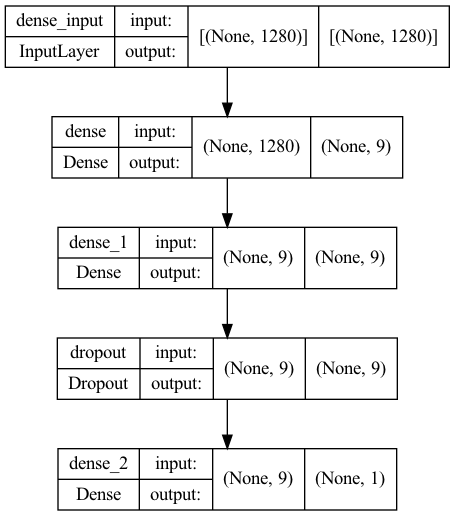

In [16]:
plot_model(
    model, to_file='model.png', show_shapes=True, 
    show_layer_names=True, dpi=96
)

In [18]:
# Train the ANN
#training = model.fit(X_train, y_train, batch_size = 24, validation_split=0.2, epochs = 100)
#-> overfits

# Define dictionary to store results
training_history = {}

# Define number of epochs and learning rate decay
N_TRAIN = len(X_train)
EPOCHS = 200
BATCH_SIZE = 24
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.01,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False)


# Define optimizer used for modelling
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, name='Adam')

In [19]:
with tf.device('/cpu:0'):
    training = model.fit(X_train,
                        y_train,
                        validation_split=0.2,
                        verbose=1,
                        batch_size=24,
                        epochs=EPOCHS)

Epoch 1/200


2022-07-01 12:27:17.346566: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 13/149 [=>............................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5288 

2022-07-01 12:27:17.624375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


149/149 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5134 - val_loss: 0.6907 - val_accuracy: 0.5573
Epoch 2/200
 12/149 [=>............................] - ETA: 0s - loss: 0.6888 - accuracy: 0.5799

2022-07-01 12:27:18.627930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


149/149 [==============================] - 1s 5ms/step - loss: 0.6845 - accuracy: 0.5637 - val_loss: 0.6804 - val_accuracy: 0.5629
Epoch 3/200
149/149 [==============================] - 1s 5ms/step - loss: 0.6671 - accuracy: 0.5929 - val_loss: 0.6677 - val_accuracy: 0.5854
Epoch 4/200
149/149 [==============================] - 1s 4ms/step - loss: 0.6558 - accuracy: 0.6098 - val_loss: 0.6563 - val_accuracy: 0.6045
Epoch 5/200
149/149 [==============================] - 1s 4ms/step - loss: 0.6481 - accuracy: 0.6278 - val_loss: 0.6476 - val_accuracy: 0.6169
Epoch 6/200
149/149 [==============================] - 1s 5ms/step - loss: 0.6390 - accuracy: 0.6407 - val_loss: 0.6475 - val_accuracy: 0.6315
Epoch 7/200
149/149 [==============================] - 1s 4ms/step - loss: 0.6270 - accuracy: 0.6472 - val_loss: 0.6342 - val_accuracy: 0.6337
Epoch 8/200
149/149 [==============================] - 1s 4ms/step - loss: 0.6263 - accuracy: 0.6483 - val_loss: 0.6342 - val_accuracy: 0.6337
Epoch 9/200

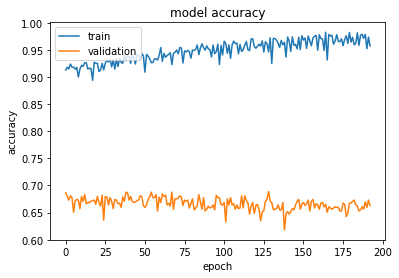

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()